# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import pandas as pd

def load_and_combine_stock_data(file_list):
    # Update path to point to your folder in Google Drive
    base_dir = '/content/drive/MyDrive/RNN_Stock_Starter_Dataset/RNN_Stocks_Data/'
    stock_dfs = []

    for file_path in file_list:
        # Extract stock names from file names
        stock_name = os.path.basename(file_path).split('_')[0]

        # Read the CSV file
        full_path = os.path.join(base_dir, file_path)
        df = pd.read_csv(full_path)

        # Drop unnecessary columns
        df = df.drop('Name', axis=1)

        # Rename columns with stock name as prefix (except Date)
        df.columns = ['Date'] + [f'{stock_name}_{col}' for col in df.columns[1:]]

        # Convert Date column to datetime
        df['Date'] = pd.to_datetime(df['Date'])

        # Add to list
        stock_dfs.append(df)

    # Merge all dataframes on Date
    combined_df = stock_dfs[0]
    for df in stock_dfs[1:]:
        combined_df = pd.merge(combined_df, df, on='Date', how='outer')

    # Set 'Date' as index
    combined_df.set_index('Date', inplace=True)
    return combined_df

# Define your list of CSVs
file_list = [
    'AMZN_stocks_data.csv',
    'GOOGL_stocks_data.csv',
    'IBM_stocks_data.csv',
    'MSFT_stocks_data.csv'
]

# Load and print
combined_stock_df = load_and_combine_stock_data(file_list)
print(combined_stock_df.head())


Mounted at /content/drive
            AMZN_Open  AMZN_High  AMZN_Low  AMZN_Close  AMZN_Volume  \
Date                                                                  
2006-01-03      47.47      47.85     46.25       47.58    7582127.0   
2006-01-04      47.48      47.73     46.69       47.25    7440914.0   
2006-01-05      47.16      48.20     47.11       47.65    5417258.0   
2006-01-06      47.97      48.58     47.32       47.87    6154285.0   
2006-01-09      46.55      47.10     46.40       47.08    8945056.0   

            GOOGL_Open  GOOGL_High  GOOGL_Low  GOOGL_Close  GOOGL_Volume  \
Date                                                                       
2006-01-03      211.47      218.05     209.32       217.83    13137450.0   
2006-01-04      222.17      224.70     220.09       222.84    15292353.0   
2006-01-05      223.22      226.00     220.97       225.85    10815661.0   
2006-01-06      228.66      235.49     226.85       233.06    17759521.0   
2006-01-09      233.

In [ ]:

# Specify the names of the raw data files to be read and use the aggregation function to read the files

file_list = [
    'AMZN_stocks_data.csv',
    'GOOGL_stocks_data.csv',
    'IBM_stocks_data.csv',
    'MSFT_stocks_data.csv'
]

# Call the above function to get combined dataframe for all 4 stocks merged by Date column
combined_stock_df = load_and_combine_stock_data(file_list)
print(combined_stock_df.head())

            AMZN_Open  AMZN_High  AMZN_Low  AMZN_Close  AMZN_Volume  \
Date                                                                  
2006-01-03      47.47      47.85     46.25       47.58    7582127.0   
2006-01-04      47.48      47.73     46.69       47.25    7440914.0   
2006-01-05      47.16      48.20     47.11       47.65    5417258.0   
2006-01-06      47.97      48.58     47.32       47.87    6154285.0   
2006-01-09      46.55      47.10     46.40       47.08    8945056.0   

            GOOGL_Open  GOOGL_High  GOOGL_Low  GOOGL_Close  GOOGL_Volume  \
Date                                                                       
2006-01-03      211.47      218.05     209.32       217.83    13137450.0   
2006-01-04      222.17      224.70     220.09       222.84    15292353.0   
2006-01-05      223.22      226.00     220.97       225.85    10815661.0   
2006-01-06      228.66      235.49     226.85       233.06    17759521.0   
2006-01-09      233.44      236.94     230.70 

In [ ]:
# View specifics of the data
print("Shape of the combined stock data frame: ",combined_stock_df.shape)
print("Columns present in the data frame: ",combined_stock_df.columns)
print("Information about the data frame:")
print(combined_stock_df.info())
print("Description of the data frame:")
print(combined_stock_df.describe())

Shape of the combined stock data frame:  (3020, 20)
Columns present in the data frame:  Index(['AMZN_Open', 'AMZN_High', 'AMZN_Low', 'AMZN_Close', 'AMZN_Volume',
       'GOOGL_Open', 'GOOGL_High', 'GOOGL_Low', 'GOOGL_Close', 'GOOGL_Volume',
       'IBM_Open', 'IBM_High', 'IBM_Low', 'IBM_Close', 'IBM_Volume',
       'MSFT_Open', 'MSFT_High', 'MSFT_Low', 'MSFT_Close', 'MSFT_Volume'],
      dtype='object')
Information about the data frame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AMZN_Open     3019 non-null   float64
 1   AMZN_High     3019 non-null   float64
 2   AMZN_Low      3019 non-null   float64
 3   AMZN_Close    3019 non-null   float64
 4   AMZN_Volume   3019 non-null   float64
 5   GOOGL_Open    3019 non-null   float64
 6   GOOGL_High    3019 non-null   float64
 7   GOOGL_Low     3019 non-null   float64
 8  

#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [ ]:
# Handle Missing Values

# Check for missing values
print("Missing values per column:")
print(combined_stock_df.isnull().sum())

# Handle missing values
combined_stock_df.ffill(inplace=True)

# Check again
print("\nMissing values after filling:")
print(combined_stock_df.isnull().sum())

Missing values per column:
AMZN_Open       1
AMZN_High       1
AMZN_Low        1
AMZN_Close      1
AMZN_Volume     1
GOOGL_Open      1
GOOGL_High      1
GOOGL_Low       1
GOOGL_Close     1
GOOGL_Volume    1
IBM_Open        1
IBM_High        0
IBM_Low         1
IBM_Close       0
IBM_Volume      0
MSFT_Open       1
MSFT_High       1
MSFT_Low        1
MSFT_Close      1
MSFT_Volume     1
dtype: int64

Missing values after filling:
AMZN_Open       0
AMZN_High       0
AMZN_Low        0
AMZN_Close      0
AMZN_Volume     0
GOOGL_Open      0
GOOGL_High      0
GOOGL_Low       0
GOOGL_Close     0
GOOGL_Volume    0
IBM_Open        0
IBM_High        0
IBM_Low         0
IBM_Close       0
IBM_Volume      0
MSFT_Open       0
MSFT_High       0
MSFT_Low        0
MSFT_Close      0
MSFT_Volume     0
dtype: int64


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

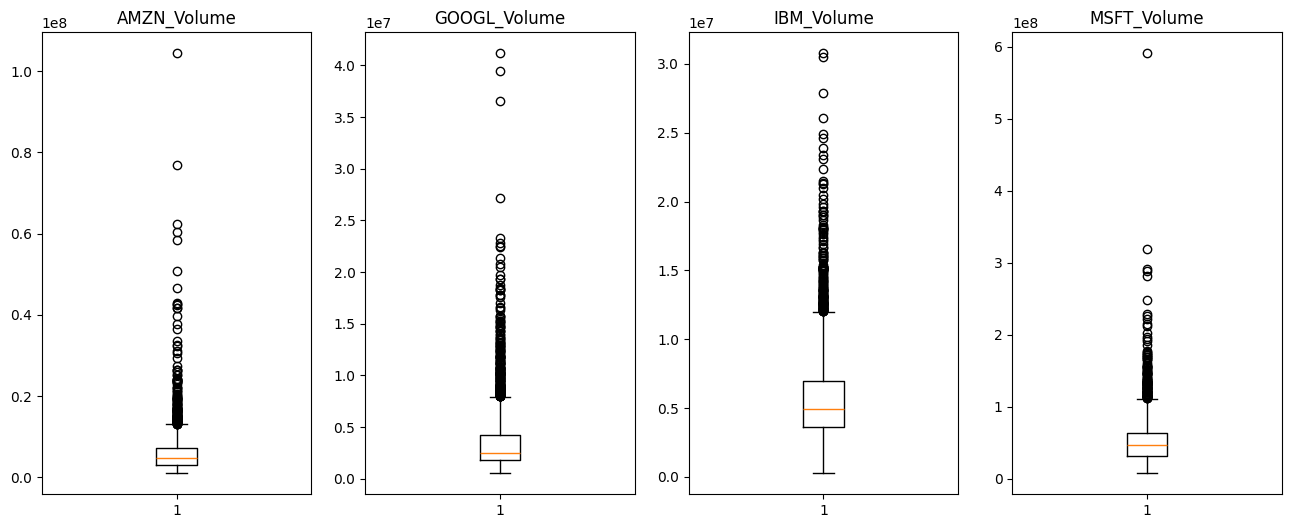

In [ ]:
# Frequency distribution of volumes

# Identify all Volume columns
volume_cols = [col for col in combined_stock_df.columns if 'Volume' in col]

# Plot each boxplot in a subplot
plt.figure(figsize=(16, 6))
for i, col in enumerate(volume_cols):
    plt.subplot(1, len(volume_cols), i+1)
    plt.boxplot(combined_stock_df[col])
    plt.title(col)
plt.show()


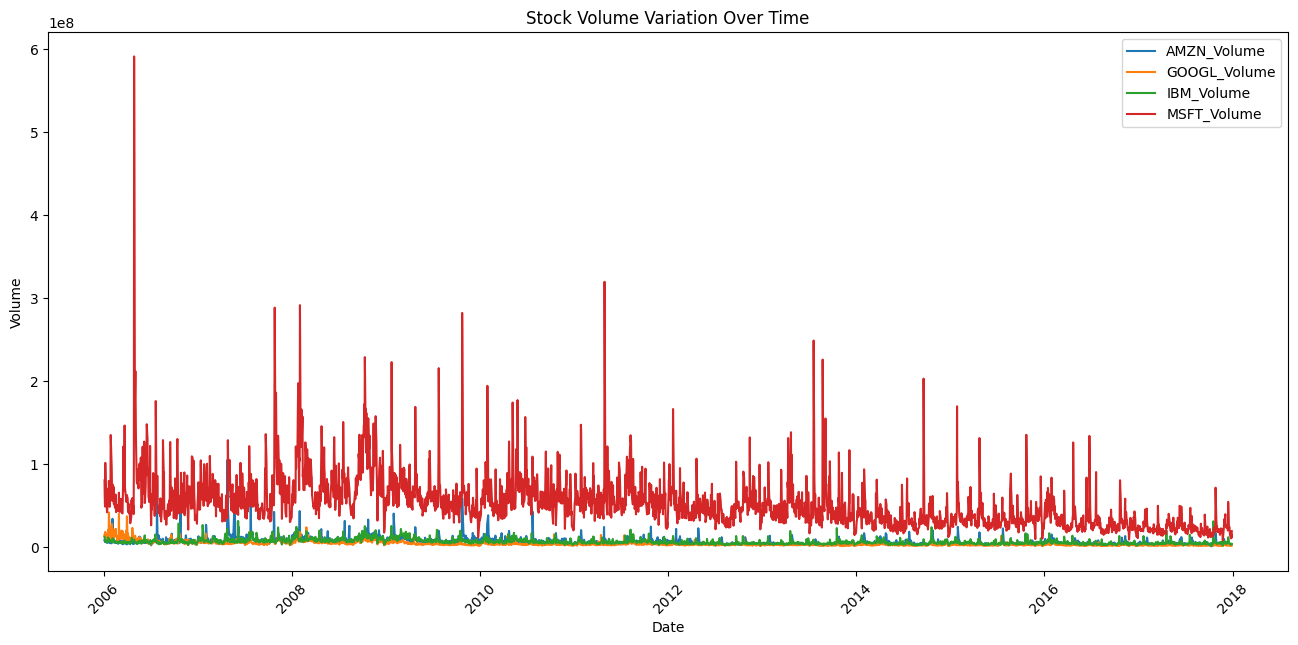

In [ ]:
# Stock volume variation over time

plt.figure(figsize=(16, 7))
for col in volume_cols:
    plt.plot(combined_stock_df.index, combined_stock_df[col], label=col)

plt.title('Stock Volume Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.show()

- We can see the volume of the Microsoft stocks in red are the highest among all 4 stock volumes with high spikes.
- Next we can see the Amazon stock volume in blue are much lower than the Microsoft stock volume but still higher that IBM and Google stock volumes.
- IBM and Google stock volumes in green and orange respectively are the lowest stock volumes.

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

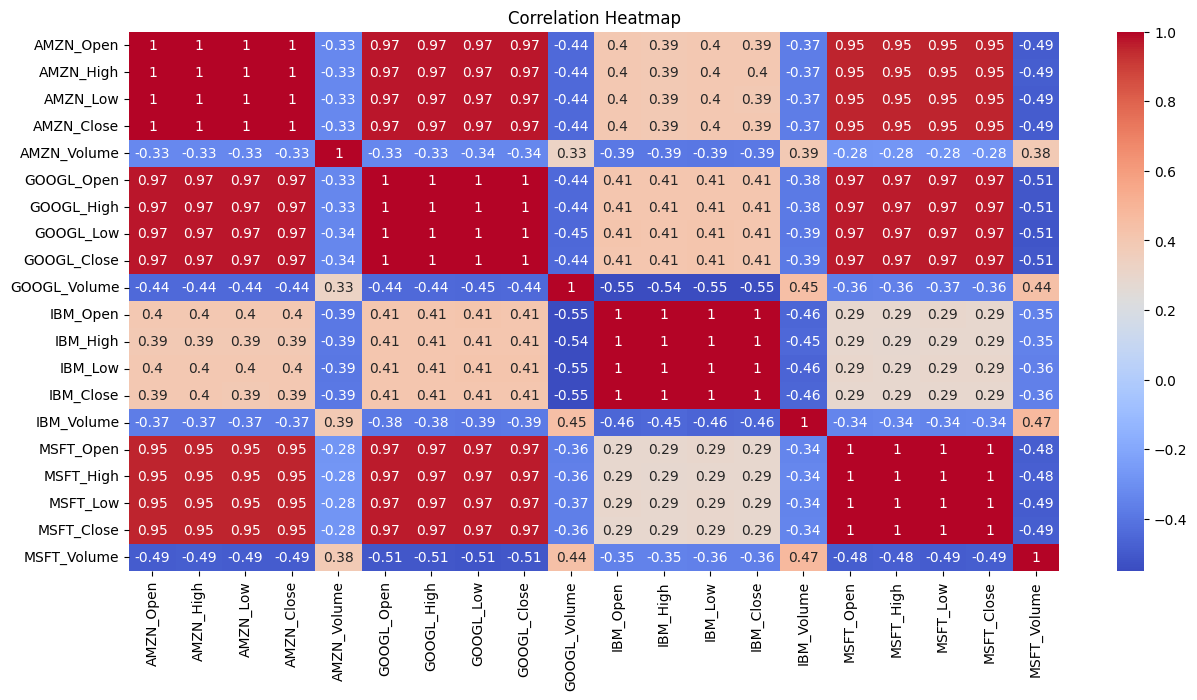

In [ ]:
# Analyse correlations
plt.figure(figsize=(15, 7))

# Plot the heatmap
sns.heatmap(combined_stock_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- From the correlation analysis, we can see there is a close colleration between the 3 stock prices(open/close/high/low): Microsoft, Amazon and Google.
- And these 3 stocks(Microsoft, Amazon and Google) prices have a very low correlation between the IBM stock price.
- Lowest correlation is between IBM stock prices and Microsoft stock prices.
- From this we can derive that the stock prices of  Microsoft, Amazon and Google must be similar and higher than the stock price of IBM.

### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [ ]:
# Define a function that divides the data into windows and generates target variable values for each window

def create_windowed_data(df, window_size, step_size, target_cols):
    X, y = [], []

    # Slide a window of size 'window_size' over the dataframe with steps of 'step_size'
    for i in range(0, len(df) - window_size, step_size):

        # Extract the window of input features
        window = df.iloc[i : i + window_size].values

        # Extract the target value right after the window
        target = df.iloc[i + window_size][target_cols].values

        # Append window and corresponding target to the lists
        X.append(window)
        y.append(target)

    # Convert the lists to numpy arrays for model compatibility
    return np.array(X), np.array(y)


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [ ]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

def scale_windowed_data(X, y):
    X_scaled, y_scaled = [], []

    # Initialize the scaler
    X_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    # Loop over each window in X and y
    for i in range(len(X)):
        window = X[i]
        # Fit the scaler incrementally on each window of X
        X_scaler.partial_fit(window)
        # Apply the transformation to the current window of X
        scaled_window = X_scaler.transform(window)


        # Reshape y to 2D as accepted by scaler
        reshaped_target = y[i].reshape(1, -1)
        # Fit and transform the target y
        y_scaler.partial_fit(reshaped_target)
        scaled_target = y_scaler.transform(reshaped_target)[0]

        # Store the scaled windows
        X_scaled.append(scaled_window)
        y_scaled.append(scaled_target)

    # Convert the scaled lists to numpy arrays
    return np.array(X_scaled), np.array(y_scaled)

Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [ ]:
# Define a function to create input and output data points from the master DataFrame

def prepare_rnn_data(df, target_cols, window_size, step_size, split_ratio):
    # Create windowed X and y
    X, y = create_windowed_data(df, window_size, step_size, target_cols)

    # Scale windowed X and y
    X_scaled, y_scaled = scale_windowed_data(X, y)

    # Perform train-test split
    split_index = int(len(X_scaled) * split_ratio)

    # For input features (X): take the first part for training, and the rest for testing
    X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]

    # For target values (y): take the first part for training, and the rest for testing
    y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

    return X_train, y_train, X_test, y_test

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

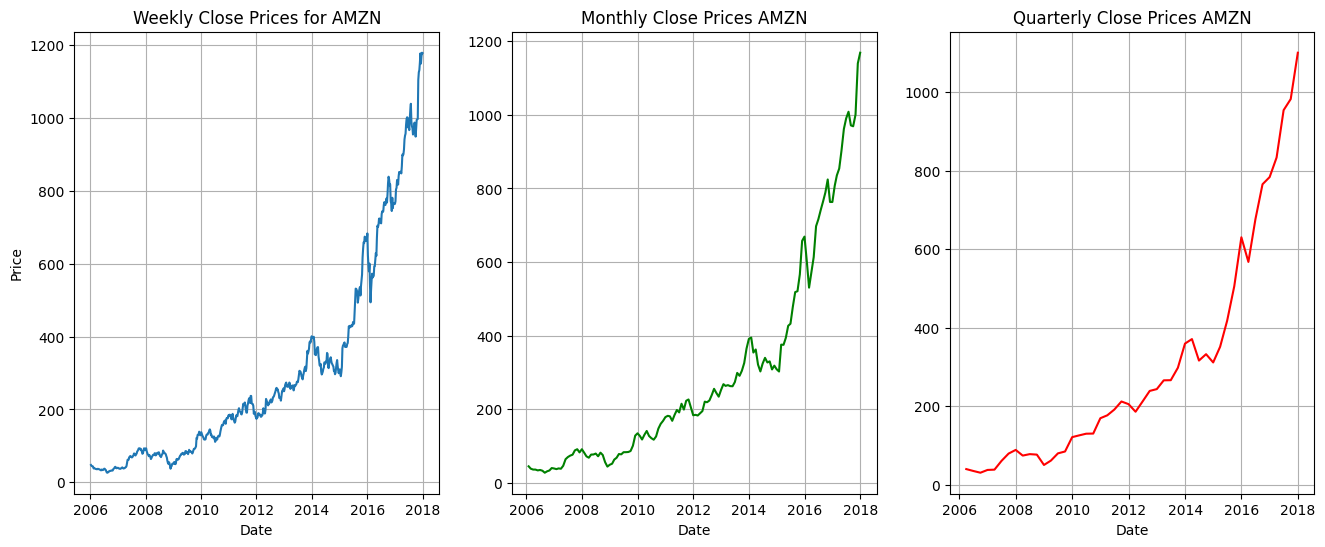

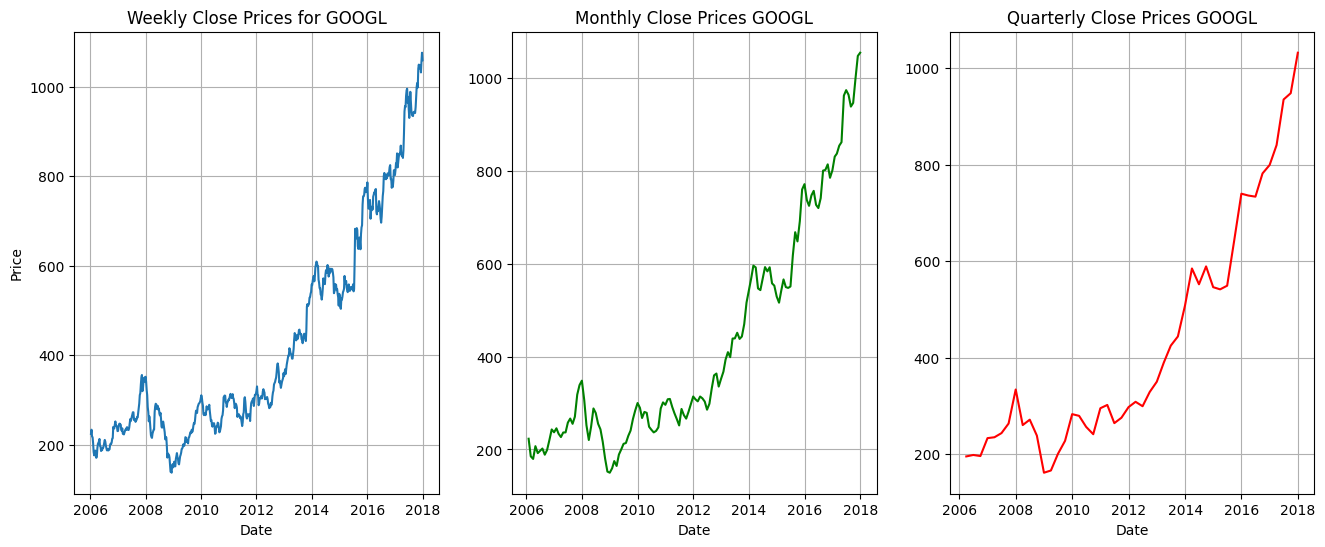

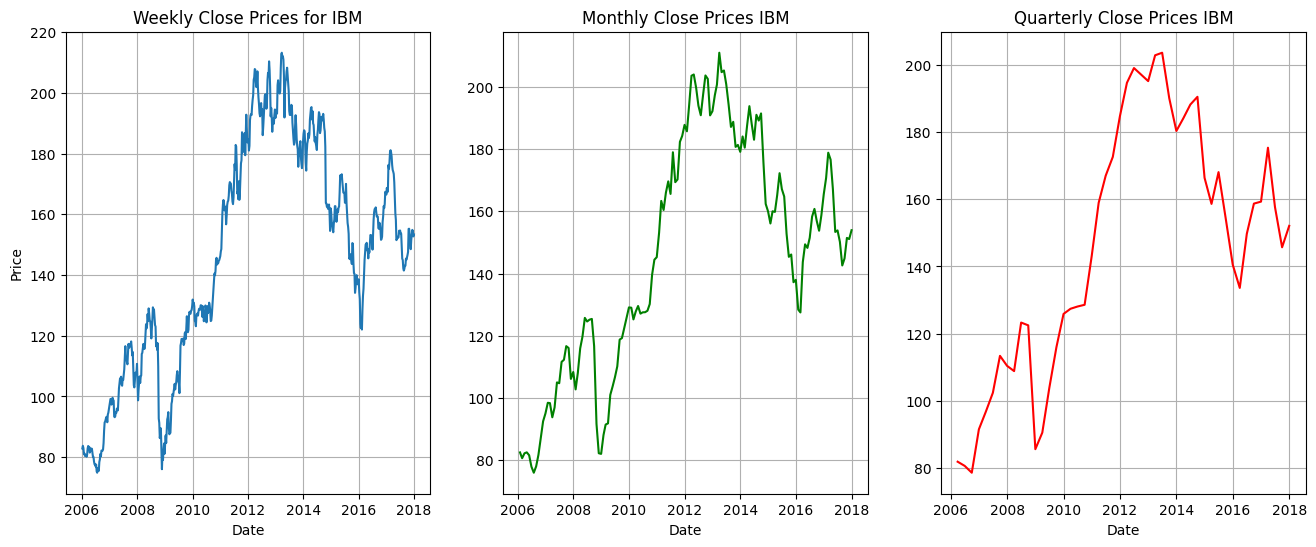

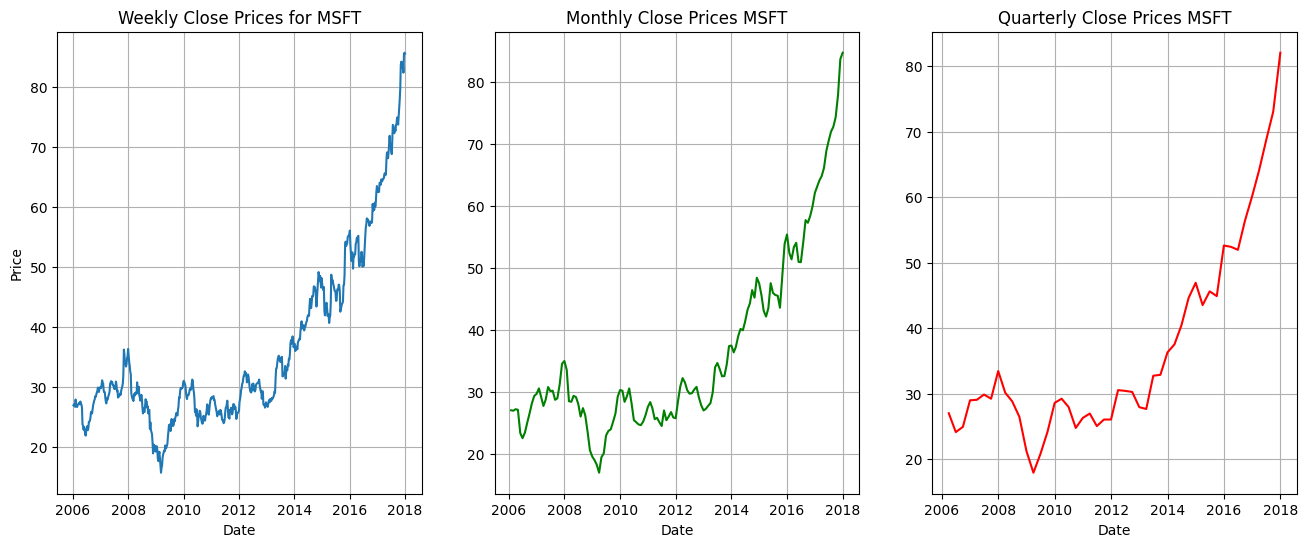

In [ ]:
# Checking for patterns in different sequence lengths

# Plotting function for a given stock name for various intervals
def plot_graphs(stock_name, weekly, monthly, quarterly):
    plt.figure(figsize=(16, 6))

    # Plot for Weekly Close Price
    plt.subplot(1, 3, 1)
    plt.plot(weekly, label='Weekly Avg')
    plt.title(f'Weekly Close Prices for {stock_name}')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)

    # Plot for Monthly Close Price
    plt.subplot(1, 3, 2)
    plt.plot(monthly, label='Monthly Avg', color='green')
    plt.title(f'Monthly Close Prices {stock_name}')
    plt.xlabel("Date")
    plt.grid(True)

    # Plot for Quarterly Close Price
    plt.subplot(1, 3, 3)
    plt.plot(quarterly, label='Quarterly Avg', color='red')
    plt.title(f'Quarterly Close Prices {stock_name}')
    plt.xlabel("Date")
    plt.grid(True)

    plt.show()

# Resample Close prices for all 4 stocks by different intervals

# Identify all Close price columns
close_cols = [col for col in combined_stock_df.columns if 'Close' in col]

for col in close_cols:
    # Weekly average
    weekly = combined_stock_df[col].resample('W').mean()
    # Monthly average
    monthly = combined_stock_df[col].resample('M').mean()
    # Quarterly average
    quarterly = combined_stock_df[col].resample('Q').mean()
    # Plot the graphs for above 3 intervals
    plot_graphs(col.split('_')[0], weekly, monthly, quarterly)


As weekly, monthly, and quarterly plots of stock’s closing price are similar in trend across timeframes which suggests:
- There's no strong seasonality or cyclic behavior that depends on shorter or longer time units.
- The data is trend-driven, not time-unit driven.
  
In such case, we can choose a moderate window size(20 business days which is approximately 1 month) that balances:
- Capturing enough historical context
- Not being too long to overfit or dilute recent trends

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [ ]:
# Create data instances from the master data frame using decided window size and window stride

# Parameters
window_size = 19
step_size = 1
split_ratio = 0.8

# Let's move ahead with AMAZON Closing stock price for first model
target_cols = ['AMZN_Close']

# Create data
X_train, y_train, X_test, y_test = prepare_rnn_data(combined_stock_df, target_cols, window_size, step_size, split_ratio)
print(f"Shape of X_train:{X_train.shape}, y_train:{y_train.shape}, X_test:{X_test.shape}, y_test:{y_test.shape}")


Shape of X_train:(2400, 19, 20), y_train:(2400, 1), X_test:(601, 19, 20), y_test:(601, 1)


In [ ]:
# Check the number of data points generated
print("Number of training samples (X_train):", X_train.shape[0])
print("Number of training targets (y_train):", y_train.shape[0])
print("Number of testing samples (X_test):", X_test.shape[0])
print("Number of testing targets (y_test):", y_test.shape[0])

total_windows = X_train.shape[0] + X_test.shape[0]
print("Total number of data windows created:", total_windows)

Number of training samples (X_train): 2400
Number of training targets (y_train): 2400
Number of testing samples (X_test): 601
Number of testing targets (y_test): 601
Total number of data windows created: 3001


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [ ]:
# Check if the datasets are compatible inputs to neural networks

#X_train should be 3D arrays of shape:
print(f"X_train shape: {X_train.shape}")

# y_train Should be 2D arrays of shape:
print(f"y_train shape: {y_train.shape}")


X_train shape: (2400, 19, 20)
y_train shape: (2400, 1)


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [ ]:
# Create a function that creates a simple RNN model according to the model configuration arguments

def build_simple_rnn(units, activation, input_shape, dropout_rate, target_len):
    # Initialize the model
    model = Sequential()

    # Add the Simple RNN layer
    model.add(SimpleRNN(units=units, activation=activation, input_shape=input_shape, return_sequences=False))

    # Add dropout for regularization
    model.add(Dropout(dropout_rate))

    # Add a Dense output layer
    model.add(Dense(target_len))

    # Compile the model with Adam optimizer and MSE loss function
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model


- As we are doing a regression task (predicting stock prices — continuous numbers), thats why considered MSE (Mean Squared Error) as the loss function, to penalize large errors heavily and optimize the model strongly.
- MAE (Mean Absolute Error) simply takes the absolute value of the errors, it's simple, interpretable, and tells how far off the predictions are on average.

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration of simple RNN

# Initialise list of configurations
units_list = [16, 32, 64, 128]
dropout_rates = [0.1, 0.2, 0.3, 0.4]
activation_list = ['tanh', 'relu']
input_shape = X_train.shape[1:]
target_len = 1
results = []

# Initialise early stopping
early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)

# Iterate through each set of hyperparameter
for units in units_list:
    for dropout in dropout_rates:
        for activation in activation_list:
            # Build a Simple RNN model with current set of hyperparameter
            model = build_simple_rnn(units, activation, input_shape, dropout, target_len)

            # Fit the model with ealy stopping
            history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

            # Find the corresponding val loss
            val_loss = history.history['val_loss'][-1]
            print(f"Training RNN with {units} units, {dropout} dropout and {activation} activation, Got val_loss:{val_loss}")

            # Store the current set of hyperparameter with its val loss
            results.append((units, dropout, activation, val_loss))


Training RNN with 16 units, 0.1 dropout and tanh activation, Got val_loss:0.0027076767291873693
Training RNN with 16 units, 0.1 dropout and relu activation, Got val_loss:0.016692645847797394
Training RNN with 16 units, 0.2 dropout and tanh activation, Got val_loss:0.024259498342871666
Training RNN with 16 units, 0.2 dropout and relu activation, Got val_loss:0.019783608615398407
Training RNN with 16 units, 0.3 dropout and tanh activation, Got val_loss:0.005350572522729635
Training RNN with 16 units, 0.3 dropout and relu activation, Got val_loss:0.006257242057472467
Training RNN with 16 units, 0.4 dropout and tanh activation, Got val_loss:0.03497329726815224
Training RNN with 16 units, 0.4 dropout and relu activation, Got val_loss:0.005633972119539976
Training RNN with 32 units, 0.1 dropout and tanh activation, Got val_loss:0.005215172655880451
Training RNN with 32 units, 0.1 dropout and relu activation, Got val_loss:0.0053586107678711414
Training RNN with 32 units, 0.2 dropout and tanh 

- The input_shape fed to SimpleRNN model is X_train.shape[1:] because X_train.shape gives something like (batch_size, timesteps, features).
So we just pass the shape of one sample = (timesteps, features).
- val_loss is calculated as history.history['val_loss'][-1] to pick the final validation loss. As, history.history gives a dictionary with training & validation loss/metrics recorded for each epoch. So, history['val_loss'] will give list of validation loss values, one for each epoch. And finally, [-1] → Pick the last validation loss after 10 epochs (i.e., after training ends) to pick the best hyperparameters.
- As 'tanh' (hyperbolic tangent) squashes outputs between -1 and 1 which means tanh allows both positive and negative values, which fits stock movement (prices can rise or fall), so 'tanh' is better for RNNs working with continuous, zero-centered data like stock prices.

In [ ]:
# Find the best configuration based on evaluation metrics

# Sort the results with ascending order of val loss and pick the first/lowest val loss
best_config = sorted(results, key=lambda x: x[3])[0]

# Find the best configuration values
best_units, best_dropout, best_activation, val_loss = best_config
print(f"Best configuration: {best_units} units, {best_dropout} dropout, {best_activation} activation, {val_loss} val_loss")

Best configuration: 128 units, 0.1 dropout, relu activation, 0.0010713113006204367 val_loss


- lambda x: x[3] will pick the forth value (val_loss) from each tuple to sort on.
- After sorting, pick the first tuple [0], this will be the one with the smallest validation loss.

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

best_model = build_simple_rnn(best_units, best_activation, input_shape, best_dropout, target_len)
history = best_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1101 - mae: 0.2222
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mae: 0.0751
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mae: 0.0671
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mae: 0.0583
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mae: 0.0559
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mae: 0.0555
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mae: 0.0515
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mae: 0.0547
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mae: 0.0527
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045 - mae: 0.0520
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045 - mae: 0.0523
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0039 - mae: 0.0498
Epoch 13/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/

Plotting the actual vs predicted values

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Shape of y_test: (601, 1)
Shape of y_pred: (601, 1)


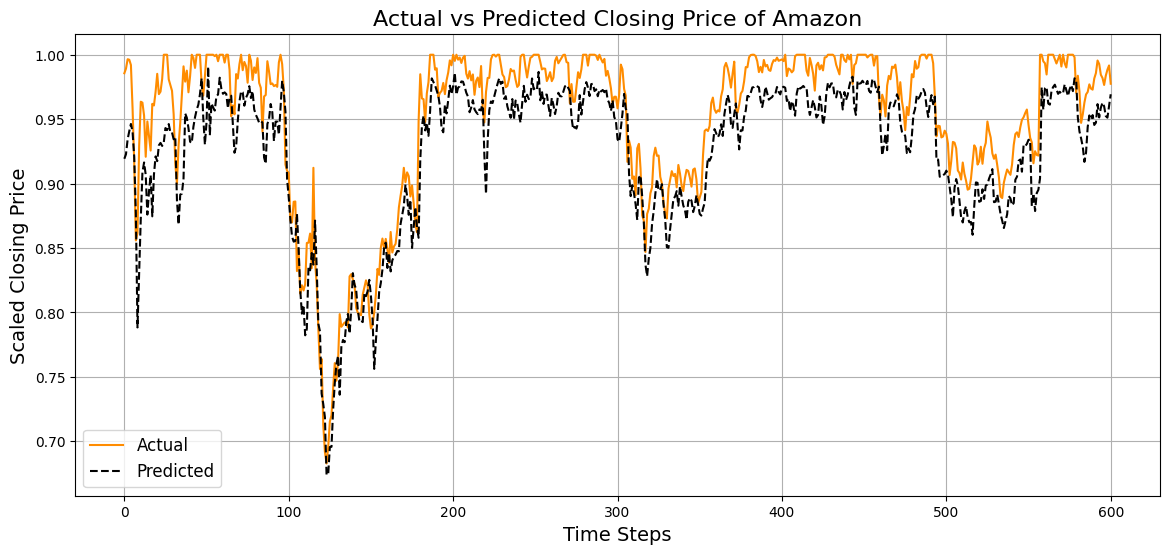

In [ ]:
# Predict on the test data and plot

# Predict on test data
y_pred = best_model.predict(X_test)

print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual', color='darkorange')
plt.plot(y_pred, label='Predicted', color='black', linestyle='--')
plt.title('Actual vs Predicted Closing Price of Amazon', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Scaled Closing Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [ ]:
# Compute the performance of the model on the testing data set

# Evaluate on the test data
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Compute performance metrices
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print out the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0306
Test Loss: 0.0009781726403161883
Test MAE: 0.02716488391160965
Mean Absolute Error (MAE): 0.02716488454950646
Mean Squared Error (MSE): 0.0009781725128811692
Root Mean Squared Error (RMSE): 0.03127574959743042
R-squared (R²): 0.7408033041863383


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [ ]:
# Define a function to create a model and specify default values for hyperparameters

def build_advance_rnn_model(rnn_type='LSTM', units=60, activation='tanh', input_shape=(20, 1), dropout_rate=0.2, target_len = 1):
    # Initialize the model
    model = Sequential()

    # Add the RNN layer (either LSTM or GRU)
    if rnn_type == 'LSTM':
        model.add(LSTM(units=units, activation=activation, input_shape=input_shape, return_sequences=False))
    elif rnn_type == 'GRU':
        model.add(GRU(units=units, activation=activation, input_shape=input_shape, return_sequences=False))
    else:
        raise ValueError("Invalid rnn_type. Choose 'LSTM' or 'GRU'.")

    # Add dropout for regularization
    model.add(Dropout(dropout_rate))

    # Add a Dense output layer
    model.add(Dense(target_len))

    # Compile the model with Adam optimizer and MSE loss function
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration

# Define hyperparameter search space
rnn_types = ['LSTM', 'GRU']
results = []

# Hyperparameter tuning loop
for rnn_type in rnn_types:
    for units in units_list:
        for dropout in dropout_rates:
            for activation in activation_list:
                # Build a Advance RNN model with current set of hyperparameter
                adv_model = build_advance_rnn_model(rnn_type, units, activation, input_shape, dropout, target_len)

                # Train the model
                adv_model_history = adv_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,
                                        verbose=0, callbacks=[early_stopping])

                # Get the validation loss after training
                adv_model_val_loss = adv_model_history.history['val_loss'][-1]
                print(f"Training Advance model with {rnn_type} {units} units, {dropout} dropout, {activation} activation, Got Val Loss: {adv_model_val_loss}")

                # Store results
                results.append((rnn_type, units, dropout, activation, adv_model_val_loss))


# Sort the results with ascending order of val loss and pick the first/lowest val loss
adv_model_best_config = sorted(results, key=lambda x: x[4])[0]

# Find the best configuration
adv_model_best_rnn_type, adv_model_best_units, adv_model_best_dropout, adv_model_best_activation, adv_model_val_loss = adv_model_best_config


Training Advance model with LSTM 16 units, 0.1 dropout, tanh activation, Got Val Loss: 0.011240717023611069
Training Advance model with LSTM 16 units, 0.1 dropout, relu activation, Got Val Loss: 0.006575240287929773
Training Advance model with LSTM 16 units, 0.2 dropout, tanh activation, Got Val Loss: 0.009579095058143139
Training Advance model with LSTM 16 units, 0.2 dropout, relu activation, Got Val Loss: 0.020736021921038628
Training Advance model with LSTM 16 units, 0.3 dropout, tanh activation, Got Val Loss: 0.003954371903091669
Training Advance model with LSTM 16 units, 0.3 dropout, relu activation, Got Val Loss: 0.011592100374400616
Training Advance model with LSTM 16 units, 0.4 dropout, tanh activation, Got Val Loss: 0.01088536623865366
Training Advance model with LSTM 16 units, 0.4 dropout, relu activation, Got Val Loss: 0.030465347692370415
Training Advance model with LSTM 32 units, 0.1 dropout, tanh activation, Got Val Loss: 0.001843648380599916
Training Advance model with L

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [ ]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

print(f"Best configuration of Advance Model: {adv_model_best_rnn_type} rnn type, {adv_model_best_units} units, {adv_model_best_dropout} dropout, {adv_model_best_activation} activation, {adv_model_val_loss} val_loss")

# Retrain the best advance RNN model
best_adv_model = build_advance_rnn_model(adv_model_best_rnn_type, adv_model_best_units, adv_model_best_activation, input_shape, adv_model_best_dropout, target_len)
best_adv_history = best_adv_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])


Best configuration of Advance Model: GRU rnn type, 32 units, 0.1 dropout, tanh activation, 0.0006568137905560434 val_loss
Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0577 - mae: 0.1828
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0147 - mae: 0.0949
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mae: 0.0721
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mae: 0.0598
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mae: 0.0590
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mae: 0.0580
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mae: 0.0558
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mae: 0.0551
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mae: 0.0542
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - mae: 0.0536
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0044 - mae: 0.0517
Epo

In [ ]:
# Compute the performance of the model on the testing data set

# Evaluate on the test data
adv_model_test_loss, adv_model_test_mae = best_adv_model.evaluate(X_test, y_test)
print(f"Test Loss: {adv_model_test_loss}")
print(f"Test MAE: {adv_model_test_mae}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0275
Test Loss: 0.0007570168818347156
Test MAE: 0.02358901873230934


Plotting the actual vs predicted values

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Shape of y_test: (601, 1)
Shape of y_pred: (601, 1)
Mean Absolute Error (MAE): 0.023589016864142894
Mean Squared Error (MSE): 0.0007570168718634435
Root Mean Squared Error (RMSE): 0.027513939591840415
R-squared (R²): 0.7994052487896524


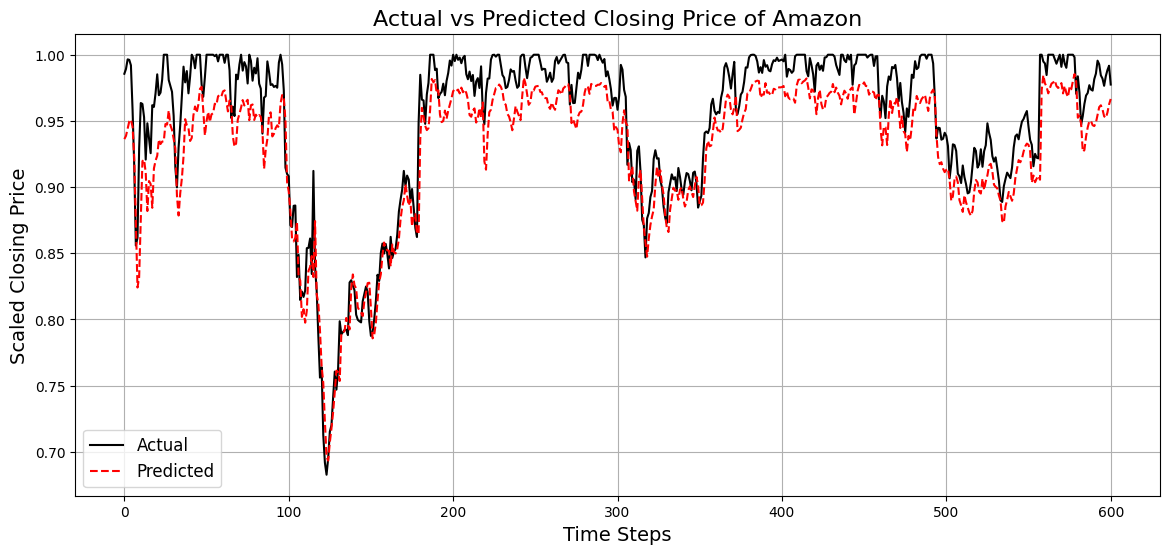

In [ ]:
# Predict on test data
y_pred_adv_model = best_adv_model.predict(X_test)

print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred_adv_model.shape}")

# Compute performance metrices
mae_adv_model = mean_absolute_error(y_test, y_pred_adv_model)
mse_adv_model = mean_squared_error(y_test, y_pred_adv_model)
rmse_adv_model = np.sqrt(mse_adv_model)
r2_adv_model = r2_score(y_test, y_pred_adv_model)

# Print out the results
print(f"Mean Absolute Error (MAE): {mae_adv_model}")
print(f"Mean Squared Error (MSE): {mse_adv_model}")
print(f"Root Mean Squared Error (RMSE): {rmse_adv_model}")
print(f"R-squared (R²): {r2_adv_model}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual', color='black')
plt.plot(y_pred_adv_model, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Closing Price of Amazon', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Scaled Closing Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter

# Parameters
window_size_new = 65
window_stride_new = 5
split_ratio_new = 0.8

# Let's move ahead with AMAZON Closing stock price for first model
multi_target_cols = close_cols
print("List of target columns:",multi_target_cols)

# Create data
X_train1, y_train1, X_test1, y_test1 = prepare_rnn_data(combined_stock_df, multi_target_cols, window_size_new, window_stride_new, split_ratio_new)
print(f"Shape of X_train:{X_train1.shape}, y_train:{y_train1.shape}, X_test:{X_test1.shape}, y_test:{y_test1.shape}")


List of target columns: ['AMZN_Close', 'GOOGL_Close', 'IBM_Close', 'MSFT_Close']
Shape of X_train:(472, 65, 20), y_train:(472, 4), X_test:(119, 65, 20), y_test:(119, 4)


In [ ]:
# Check the number of data points generated

print("Number of training samples (X_train):", X_train1.shape[0])
print("Number of training targets (y_train):", y_train1.shape[0])
print("Number of testing samples (X_test):", X_test1.shape[0])
print("Number of testing targets (y_test):", y_test1.shape[0])

total_windows1 = X_train1.shape[0] + X_test1.shape[0]
print("Total number of data windows created:", total_windows1)

Number of training samples (X_train): 472
Number of training targets (y_train): 472
Number of testing samples (X_test): 119
Number of testing targets (y_test): 119
Total number of data windows created: 591


### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN

# Initialise the input shape and output lenth (4 for multiple target stocks)
input_shape1 = X_train1.shape[1:]
target_len1 = 4
results1 = []

# Loop through the hyperparmeters
for units in units_list:
    for dropout in dropout_rates:
        for activation in activation_list:
            # Build a Simple RNN model with current set of hyperparameter
            model1 = build_simple_rnn(units, activation, input_shape1, dropout, target_len1)

            # Train the model
            history1 = model1.fit(X_train1, y_train1, epochs=10, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

            # Get the validation loss after training
            val_loss1 = history1.history['val_loss'][-1]
            print(f"Training RNN with {units} units, {dropout} dropout and {activation} activation, Got val_loss:{val_loss1}")

            # Store the results
            results1.append((units, dropout, activation, val_loss1))


Training RNN with 16 units, 0.1 dropout and tanh activation, Got val_loss:0.04964438080787659
Training RNN with 16 units, 0.1 dropout and relu activation, Got val_loss:0.08494705706834793
Training RNN with 16 units, 0.2 dropout and tanh activation, Got val_loss:0.15279999375343323
Training RNN with 16 units, 0.2 dropout and relu activation, Got val_loss:0.06258682161569595
Training RNN with 16 units, 0.3 dropout and tanh activation, Got val_loss:0.062366366386413574
Training RNN with 16 units, 0.3 dropout and relu activation, Got val_loss:0.08061470091342926
Training RNN with 16 units, 0.4 dropout and tanh activation, Got val_loss:0.06403682380914688
Training RNN with 16 units, 0.4 dropout and relu activation, Got val_loss:0.20397350192070007
Training RNN with 32 units, 0.1 dropout and tanh activation, Got val_loss:0.06507478654384613
Training RNN with 32 units, 0.1 dropout and relu activation, Got val_loss:0.08533605188131332
Training RNN with 32 units, 0.2 dropout and tanh activation

In [ ]:
# Sort the results with ascending order of val loss and pick the first/lowest val loss
best_config1 = sorted(results1, key=lambda x: x[3])[0]

# Find the best configuration
best_units1, best_dropout1, best_activation1, val_loss1 = best_config1

print(f"Best configuration: {best_units1} units, {best_dropout1} dropout, {best_activation1} activation, val_loss: {val_loss1} ")

Best configuration: 128 units, 0.3 dropout, relu activation, val_loss: 0.003402259899303317 


In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the

best_model1 = build_simple_rnn(best_units1, best_activation1, input_shape1, best_dropout1, target_len1)
history1 = best_model1.fit(X_train1, y_train1, epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.5638 - mae: 0.5719
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0935 - mae: 0.2430
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0578 - mae: 0.1881
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0549 - mae: 0.1823
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0421 - mae: 0.1603
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0348 - mae: 0.1469
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0348 - mae: 0.1456
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0311 - mae: 0.1356
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0301 - mae: 0.1343
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0272 - mae: 0.1262
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0215 - mae: 0.1157
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0248 - mae: 0.1221
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Compute the performance of the model on the testing data set

# Evaluate on the test data
test_loss1, test_mae1 = best_model1.evaluate(X_test1, y_test1)
print(f"Test Loss: {test_loss1}")
print(f"Test MAE: {test_mae1}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - mae: 0.0297 
Test Loss: 0.001144961453974247
Test MAE: 0.028439966961741447


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Shape of y_test: (119, 4)
Shape of y_pred: (119, 4)
Mean Absolute Error (MAE): 0.02843997040802492
Mean Squared Error (MSE): 0.0011449617505384848
Root Mean Squared Error (RMSE): 0.033837283439107295
R-squared (R²): 0.6443912212759191


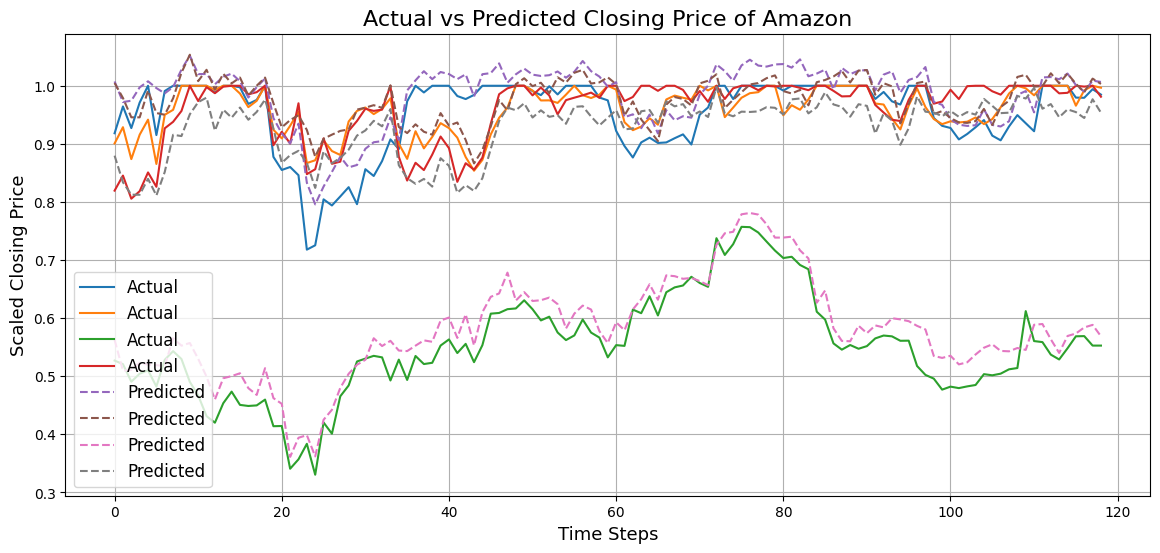

In [ ]:
# Plotting the actual vs predicted values for all targets

# Predict on test data
y_pred1 = best_model1.predict(X_test1)

print(f"Shape of y_test: {y_test1.shape}")
print(f"Shape of y_pred: {y_pred1.shape}")

# Compute performance metrices
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test1, y_pred1)

# Print out the results
print(f"Mean Absolute Error (MAE): {mae1}")
print(f"Mean Squared Error (MSE): {mse1}")
print(f"Root Mean Squared Error (RMSE): {rmse1}")
print(f"R-squared (R²): {r21}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(y_test1, label='Actual')
plt.plot(y_pred1, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Closing Price of Amazon', fontsize=16)
plt.xlabel('Time Steps', fontsize=13)
plt.ylabel('Scaled Closing Price', fontsize=13)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN

results1 = []

# Hyperparameter tuning loop
for rnn_type in rnn_types:
    for units in units_list:
        for dropout in dropout_rates:
            for activation in activation_list:
                # Build a Advance RNN model with current set of hyperparameter
                adv_model1 = build_advance_rnn_model(rnn_type, units, activation, input_shape1, dropout, target_len1)

                # Train the model
                adv_model_history1 = adv_model1.fit(X_train1, y_train1, epochs=20, batch_size=32, validation_split=0.2,
                                        verbose=0, callbacks=[early_stopping])

                # Get the validation loss after training
                adv_model_val_loss1 = adv_model_history1.history['val_loss'][-1]
                print(f"Training Advance model with {rnn_type} {units} units, {dropout} dropout, {activation} activation, Got Val Loss: {adv_model_val_loss1}")

                # Store results
                results1.append((rnn_type, units, dropout, activation, adv_model_val_loss1))


Training Advance model with LSTM 16 units, 0.1 dropout, tanh activation, Got Val Loss: 0.016700388863682747
Training Advance model with LSTM 16 units, 0.1 dropout, relu activation, Got Val Loss: 0.030660131946206093
Training Advance model with LSTM 16 units, 0.2 dropout, tanh activation, Got Val Loss: 0.07342594861984253
Training Advance model with LSTM 16 units, 0.2 dropout, relu activation, Got Val Loss: 0.2049468755722046
Training Advance model with LSTM 16 units, 0.3 dropout, tanh activation, Got Val Loss: 0.05889507010579109
Training Advance model with LSTM 16 units, 0.3 dropout, relu activation, Got Val Loss: 0.026004821062088013
Training Advance model with LSTM 16 units, 0.4 dropout, tanh activation, Got Val Loss: 0.04872477799654007
Training Advance model with LSTM 16 units, 0.4 dropout, relu activation, Got Val Loss: 0.09509804099798203
Training Advance model with LSTM 32 units, 0.1 dropout, tanh activation, Got Val Loss: 0.012065628543496132
Training Advance model with LSTM 3

In [ ]:
# Sort the results with ascending order of val loss and pick the first/lowest val loss
adv_model_best_config1 = sorted(results1, key=lambda x: x[4])[0]

# Find the best configuration
adv_model_best_rnn_type1, adv_model_best_units1, adv_model_best_dropout1, adv_model_best_activation1, adv_model_val_loss1 = adv_model_best_config1

print(f"Best configuration of Advance Model: {adv_model_best_rnn_type1} rnn type, {adv_model_best_units1} units, {adv_model_best_dropout1} dropout, {adv_model_best_activation1} activation, val_loss:{adv_model_val_loss1}")


Best configuration of Advance Model: GRU rnn type, 128 units, 0.3 dropout, tanh activation, val_loss:0.0013265510788187385


In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model

# Train the best model
best_adv_model1 = build_advance_rnn_model(adv_model_best_rnn_type1, adv_model_best_units1, adv_model_best_activation1, input_shape1, adv_model_best_dropout1, target_len1)
best_adv_history1 = best_adv_model1.fit(X_train1, y_train1, epochs=20, batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.3901 - mae: 0.5082
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0633 - mae: 0.2025
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0411 - mae: 0.1588
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0305 - mae: 0.1376
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0263 - mae: 0.1263
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0201 - mae: 0.1112
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0190 - mae: 0.1059
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0169 - mae: 0.0997
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0176 - mae: 0.0996
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0147 - mae: 0.0943
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0157 - mae: 0.0911
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0142 - mae: 0.0907
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━

In [ ]:
# Compute the performance of the model on the testing data set

# Evaluate on the test data
adv_model_test_loss1, adv_model_test_mae1 = best_adv_model1.evaluate(X_test1, y_test1)
print(f"Test Loss: {adv_model_test_loss1}")
print(f"Test MAE: {adv_model_test_mae1}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014 - mae: 0.0314 
Test Loss: 0.0012437965488061309
Test MAE: 0.030603541061282158


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Shape of y_test: (119, 4)
Shape of y_pred: (119, 4)
Mean Absolute Error (MAE): 0.03060353965277428
Mean Squared Error (MSE): 0.001243796603396932
Root Mean Squared Error (RMSE): 0.03526750066841896
R-squared (R²): 0.5777917892107554


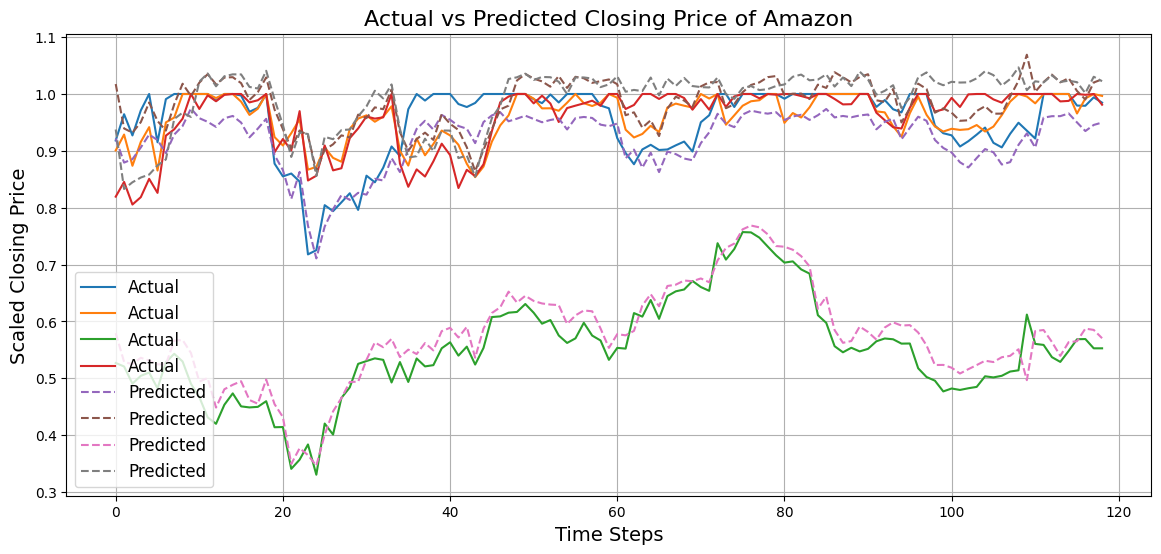

In [ ]:
# Plotting the actual vs predicted values for all targets

# Predict on test data
y_pred_adv_model1 = best_adv_model1.predict(X_test1)

print(f"Shape of y_test: {y_test1.shape}")
print(f"Shape of y_pred: {y_pred_adv_model1.shape}")

# Compute performance metrices
mae_adv_model1 = mean_absolute_error(y_test1, y_pred_adv_model1)
mse_adv_model1 = mean_squared_error(y_test1, y_pred_adv_model1)
rmse_adv_model1 = np.sqrt(mse_adv_model1)
r2_adv_model1 = r2_score(y_test1, y_pred_adv_model1)

# Print out the results
print(f"Mean Absolute Error (MAE): {mae_adv_model1}")
print(f"Mean Squared Error (MSE): {mse_adv_model1}")
print(f"Root Mean Squared Error (RMSE): {rmse_adv_model1}")
print(f"R-squared (R²): {r2_adv_model1}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(y_test1, label='Actual')
plt.plot(y_pred_adv_model1, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Closing Price of Amazon', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Scaled Closing Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

This project focused on designing and assessing various recurrent neural network models—namely Simple RNN, LSTM, and GRU—for forecasting stock closing prices using time series data. The workflow involved thorough preprocessing, including windowing and normalization, followed by structured model development. I carried out comprehensive hyperparameter tuning to fine-tune the architectures for optimal performance.

### Key insights and outcomes:

Model Evaluation:
Advanced recurrent models such as LSTM and GRU demonstrated superior performance over basic RNNs, primarily due to their ability to effectively learn long-range patterns in stock price sequences.

Tuning Parameters:
Adjustments in model parameters like the number of hidden units, activation types, and dropout ratios had a notable effect on forecasting accuracy. The most effective configurations often included 64 or 128 units, dropout between 0.1 and 0.4, and ReLU activation for stable convergence.

Forecasting Accuracy:
After tuning, LSTM and GRU models yielded improved metrics—lower mean squared error (MSE) and reduced mean absolute error (MAE)—in comparison to standard RNNs. Techniques such as dropout regularization and early stopping helped control overfitting.

Analysis of Errors:
Although the models closely followed true stock prices in most cases, some deviations occurred during periods of high market volatility, which remains a common limitation in financial time series modeling.

Practical Relevance:
The models successfully produced dependable short-term forecasts of stock closing prices, highlighting their potential utility in domains such as risk mitigation, investment planning, and trading strategy development.

### Final Outcome:

-The most accurate and stable predictions were obtained using a well-tuned GRU model, which effectively minimized overfitting while maintaining strong forecasting performance.

Careful hyperparameter optimization played a key role in enhancing model accuracy.

Among the tested architectures, advanced RNN variants like GRU and LSTM proved significantly more capable for stock price time series forecasting than the basic RNN approach.

